## GPU 사용 여부
tensorflow 패키지만 설치시 CUDA 설치와 관계 없이 GPU 미사용으로 나온다.

## tensorflow-GPU 설치
pip install tensorflow-gpu
conda install tensorflow-gpu

In [38]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import tensorflow as tf

rand = tf.random.uniform([1], 0, 1)
rand

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.10582387], dtype=float32)>

In [2]:
rand2 = tf.random.uniform([1], 0, 1, dtype=tf.dtypes.float64)
rand2

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.2016181])>

In [3]:
rand2 = tf.random.uniform([4], 0, 1, dtype=tf.dtypes.float64)
rand2

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.43816773, 0.71249364, 0.86367595, 0.97675259])>

In [4]:
rand2.shape

TensorShape([4])

In [5]:
rand2.dtype

tf.float64

In [6]:
rand2 = tf.random.normal([4], 0, 1)
rand2

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.09474412,  0.76254255, -1.1189549 ,  0.04723416], dtype=float32)>

In [7]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [8]:
# 3.11 뉴런의 입력과 출력 정의
x = 1 
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.29454186934062765


In [9]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.0844070539635483 0.0844070539635483
199 -0.04705375253068744 0.04705375253068744
299 -0.032381319886107596 0.032381319886107596
399 -0.024622190410688024 0.024622190410688024
499 -0.01983979851313327 0.01983979851313327
599 -0.016602688924811742 0.016602688924811742
699 -0.014268427166589883 0.014268427166589883
799 -0.012506613439998532 0.012506613439998532
899 -0.01113021806326115 0.01113021806326115
999 -0.010025556010039923 0.010025556010039923


In [10]:
# 3.13 x=0일 때, y=1을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [11]:
# 3.14 x=0일 때, y=1을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.10275935098238109 0.8972406490176189
199 0.05252244590492816 0.9474775540950718
299 0.03492414977053937 0.9650758502294606
399 0.026077737424390013 0.97392226257561
499 0.02077892360914979 0.9792210763908502
599 0.017257546342713925 0.9827424536572861
699 0.01475056542539488 0.9852494345746051
799 0.012876160364671208 0.9871238396353288
899 0.011422349590927472 0.9885776504090725
999 0.010262231397978216 0.9897377686020218


In [12]:
# 3.16 첫 번째 신경망 네트워크: AND
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.10400484677713578
399 -0.06343274301669358
599 -0.04550172936015148
799 -0.03537567821517189
999 -0.028885389751549348
1199 -0.024380208270862805
1399 -0.021075326303963533
1599 -0.018549288221897855
1799 -0.016558895775275806
1999 -0.01494947218843278


In [13]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i] * w) + b))

X: [1 1] Y: [1] Output: 0.9650996523887275
X: [1 0] Y: [0] Output: 0.024733125332178463
X: [0 1] Y: [0] Output: 0.02480840218727313
X: [0 0] Y: [0] Output: 2.3329832574930053e-05


In [14]:
# 3.21 두 번째 신경망 네트워크: OR
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.04282811040337001
399 -0.023829783570436663
599 -0.01642756683549733
799 -0.012497410960233095
999 -0.010068526205686067
1199 -0.008422039626847726
1399 -0.007234226424539809
1599 -0.0063370161325203705
1799 -0.005636971729308351
1999 -0.005073897089367285


In [41]:
# 3.21 세 번째 신경망 네트워크: XOR
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)
        print(w)
        print(b)
        print(error)
        print("")

199 -0.002545915425882561
tf.Tensor([ 0.03579131 -0.01166996], shape=(2,), dtype=float32)
tf.Tensor([0.01577254], shape=(1,), dtype=float32)
-0.5168581978791436

399 -0.00010350882228749025
tf.Tensor([ 0.05071551 -0.00053715], shape=(2,), dtype=float32)
tf.Tensor([0.0006412], shape=(1,), dtype=float32)
-0.5129819302656191

599 -4.207739033978974e-06
tf.Tensor([ 5.1259134e-02 -2.2206455e-05], shape=(2,), dtype=float32)
tf.Tensor([2.6062131e-05], shape=(1,), dtype=float32)
-0.5128243102398904

799 -1.6008220748986446e-07
tf.Tensor([ 5.1280838e-02 -9.1269612e-07], shape=(2,), dtype=float32)
tf.Tensor([1.0542572e-06], shape=(1,), dtype=float32)
-0.5128179023001046

999 5.5842631629943185e-09
tf.Tensor([ 5.1281720e-02 -4.4703484e-08], shape=(2,), dtype=float32)
tf.Tensor([3.7252903e-08], shape=(1,), dtype=float32)
-0.5128176417011571

1199 3.722842145670313e-09
tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)
-0.5128

In [29]:
# 3.27 tf.keras를 이용한 XOR 네트워크 연산
import numpy as np
x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 3.28 tf.keras를 이용한 2-레이어 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 2/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2543
Epoch 3/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2544
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 5/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2544
Epoch 6/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2543
Epoch 7/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2544
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 9/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2543
Epoch 10/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 11/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2543
Epoch 12/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 

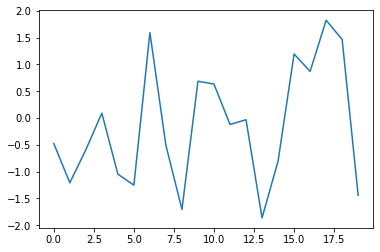

In [37]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()